In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [150]:
crime = pd.read_csv("datalab copy.csv", index_col = 0)

In [151]:
print(crime.head())


  FechaInicio                                           Delito  \
1  20/12/2019             ROBO A CASA HABITACION SIN VIOLENCIA   
2  20/12/2019                LESIONES INTENCIONALES POR GOLPES   
3  20/12/2019                 DESAPARICION FORZADA DE PERSONAS   
4  20/12/2019  DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL   
5  20/12/2019                               VIOLENCIA FAMILIAR   

                Categoria       Sexo  Edad        CalidadJuridica  FechaHecho  \
1  DELITO DE BAJO IMPACTO  Masculino   NaN  VICTIMA Y DENUNCIANTE  19/12/2019   
2  DELITO DE BAJO IMPACTO  Masculino   NaN  VICTIMA Y DENUNCIANTE  19/12/2019   
3  DELITO DE BAJO IMPACTO  Masculino  36.0                VICTIMA  19/12/2019   
4  DELITO DE BAJO IMPACTO   Femenino   NaN  VICTIMA Y DENUNCIANTE  01/12/2019   
5  DELITO DE BAJO IMPACTO   Femenino  24.0  VICTIMA Y DENUNCIANTE  20/12/2019   

  HoraHecho HoraInicio                      geopoint         AlcaldiaHechos  \
1  16:00:00   03:26:00      19.367423

In [152]:
print(crime.Categoria.unique())

['DELITO DE BAJO IMPACTO' 'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA'
 'HECHO NO DELICTIVO'
 'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA'
 'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA'
 'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA'
 'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA' 'VIOLACIÓN'
 'ROBO A REPARTIDOR CON Y SIN VIOLENCIA' 'HOMICIDIO DOLOSO'
 'ROBO A NEGOCIO CON VIOLENCIA'
 'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO'
 'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA'
 'ROBO A CASA HABITACIÓN CON VIOLENCIA']


In [153]:
# ['DELITO DE BAJO IMPACTO' 'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA'
#  'HECHO NO DELICTIVO'
#  'ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA'
#  'ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA'
#  'ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA'
#  'ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA' 'VIOLACIÓN'
#  'ROBO A REPARTIDOR CON Y SIN VIOLENCIA' 'HOMICIDIO DOLOSO'
#  'ROBO A NEGOCIO CON VIOLENCIA'
#  'LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO'
#  'ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA'
#  'ROBO A CASA HABITACIÓN CON VIOLENCIA']
delitos_ai = ['ROBO DE VEHÍCULO CON Y SIN VIOLENCIA','ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN VIOLENCIA','ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA','ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA','ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON VIOLENCIA','VIOLACIÓN','ROBO A REPARTIDOR CON Y SIN VIOLENCIA','HOMICIDIO DOLOSO','ROBO A NEGOCIO CON VIOLENCIA','LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO','ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA','ROBO A CASA HABITACIÓN CON VIOLENCIA']

In [154]:
crime = crime[crime['Categoria'].isin(delitos_ai)]


In [155]:
crime_geopoints = crime["geopoint"]
print(crime_geopoints.head())

7     19.5282905275,-99.1565738077
12    19.3775720483,-99.2007773176
15    19.4297197848,-99.0625958411
22      19.3232514188,-99.21941098
31    19.3403877016,-99.0492215798
Name: geopoint, dtype: object


In [156]:
crime_geopoints = crime_geopoints.str.split(pat=",", n=2, expand=True)
crime_geopoints.columns = ['lat', 'lon']
crime_geopoints = crime_geopoints.astype(float)
print(crime_geopoints)

            lat        lon
7     19.528291 -99.156574
12    19.377572 -99.200777
15    19.429720 -99.062596
22    19.323251 -99.219411
31    19.340388 -99.049222
...         ...        ...
1482  19.259920 -99.009722
1490  19.377075 -99.217605
1494  19.296318 -99.056501
1496  19.485476 -99.108802
1497  19.485476 -99.108802

[257 rows x 2 columns]


In [157]:
margin  = 30e-2
bounds = np.array([crime_geopoints.lat.min(),crime_geopoints.lat.max(),crime_geopoints.lon.min(),crime_geopoints.lon.max()])
print(bounds)



[ 19.20461564  19.56117547 -99.30458513 -98.96912814]


(19.2046156439, 19.5611754719)

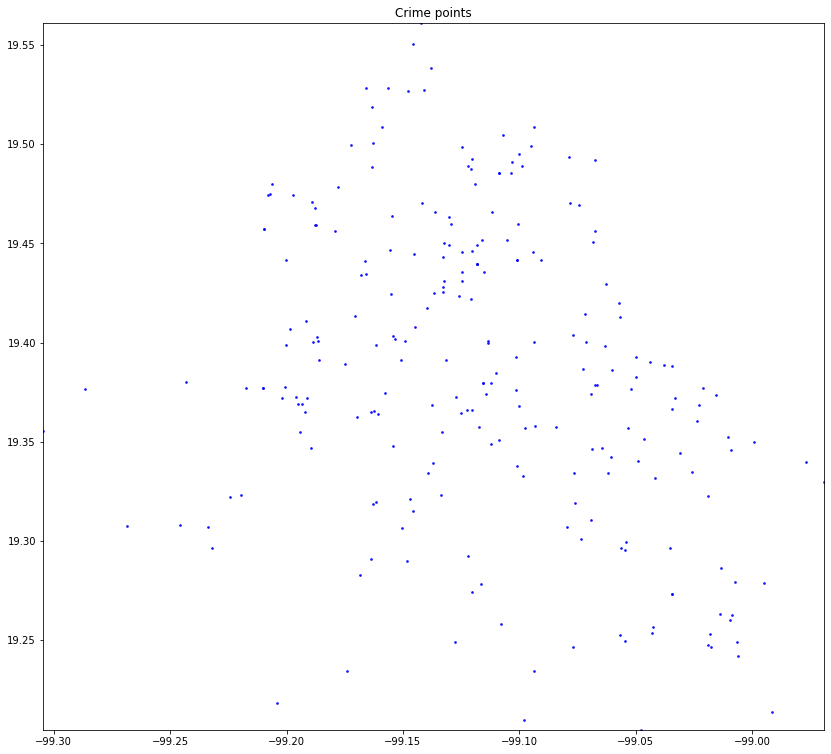

In [161]:
fig_q, ax_q = plt.subplots(figsize = (14,13))
ax_q.scatter(crime_geopoints.lon, crime_geopoints.lat, zorder=1, alpha= 0.8, c='b', s=3)
ax_q.set_title('Crime points')
ax_q.set_xlim(bounds[2],bounds[3])
ax_q.set_ylim(bounds[0],bounds[1])